FRUIT DATASET


1.IMPORT LIBRARIES

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
pwd

'/home/wsuser/work'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [6]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

In [7]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='LBlUarEH7xpvu5ZOFUR-HSs57HU_Cyr8fYxo4x5P-JGM',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'fertilizersrecommendationsystemfo-donotdelete-pr-m1rs1v2pygppji'
object_key = 'Fertilizers_Recommendation_ System_For_Disease_ Prediction.zip'

streaming_body_4 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [8]:
ls

In [9]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_4.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [10]:
ls

'Dataset Plant Disease'/


2.IMAGE PROCESSING

In [11]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [12]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
Fertilizers="/home/wsuser/work"

In [14]:
x_train=train_datagen.flow_from_directory(r"/home/wsuser/work/Dataset Plant Disease/fruit-dataset",target_size=(64,64),
                                                            class_mode="categorical",batch_size=24)

Found 7070 images belonging to 1 classes.


In [15]:
x_test=test_datagen.flow_from_directory(r"/home/wsuser/work/Dataset Plant Disease/fruit-dataset",target_size=(64,64),
                                                            class_mode="categorical",batch_size=24)

Found 7070 images belonging to 1 classes.


3.INITIALIZE MODEL

In [16]:
model=Sequential()

4.CREATE MODEL: CNN ADD LAYERS (CONVOLUTION 2D,MAXPOOLING 2D,FLATTEN)

In [17]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))

In [18]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
model.add(Flatten())

5.DENSE LAYERS(HIDDEN)

In [20]:
model.add(Dense(300,activation='relu'))

In [21]:
model.add(Dense(1,activation="softmax"))

6.COMPILE THE MODEL

In [22]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [23]:
len(x_train)

295

In [24]:
len(x_test)

295

7.FIT THE MODEL

In [25]:
model.fit(x_train,epochs=5,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))

Epoch 1/5
295/295 [==============================] - 154s 519ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
295/295 [==============================] - 148s 502ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
295/295 [==============================] - 158s 536ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
295/295 [==============================] - 166s 564ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
295/295 [==============================] - 165s 561ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000



8.SAVE THE MODEL

In [26]:
model.save("fruit.h5")

9.TEST THE MODEL

In [27]:
model=load_model("fruit.h5")

In [28]:
img=image.load_img("/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___Black_rot/00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593.JPG",target_size=(64,64))

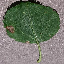

In [29]:
img

In [30]:
type(img)

PIL.Image.Image

In [31]:
x = image.img_to_array(img)

In [32]:
x

array([[[144., 129., 132.],
        [135., 120., 123.],
        [146., 131., 134.],
        ...,
        [163., 148., 151.],
        [194., 179., 182.],
        [147., 132., 135.]],

       [[167., 152., 155.],
        [156., 141., 144.],
        [181., 166., 169.],
        ...,
        [147., 132., 135.],
        [156., 141., 144.],
        [144., 129., 132.]],

       [[155., 140., 143.],
        [177., 162., 165.],
        [122., 107., 110.],
        ...,
        [145., 130., 133.],
        [135., 120., 123.],
        [137., 122., 125.]],

       ...,

       [[179., 166., 173.],
        [171., 158., 165.],
        [126., 113., 120.],
        ...,
        [148., 136., 140.],
        [162., 150., 154.],
        [162., 150., 154.]],

       [[164., 151., 158.],
        [141., 128., 135.],
        [152., 139., 146.],
        ...,
        [148., 136., 140.],
        [175., 163., 167.],
        [155., 143., 147.]],

       [[160., 147., 154.],
        [161., 148., 155.],
        [155., 1

In [33]:
x.shape

(64, 64, 3)

In [34]:
x = np.expand_dims(x,axis=0)

In [35]:
x.shape

(1, 64, 64, 3)

In [36]:
pred_prob = model.predict(x)

In [37]:
pred_prob

array([[1.]], dtype=float32)

In [38]:
class_name=["Apple__Black_dot","Apple__healthy","Corn_(maize)__healthy","Corn_(maize)__Northern_Leaf_Blight","Peach__Bacterial_spot","Peach__healthy"]
pred_id = pred_prob.argmax(axis=1)[0]

In [39]:
pred_id

0

In [40]:
print("Predicted fruit is ",str(class_name[pred_id]))

Predicted fruit is  Apple__Black_dot


In [41]:
##IBM DEPLOYMENT

In [42]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 19.1 MB/s eta 0:00:01


In [43]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"XwcbUlEmTETv_JJFHbd_uHXsfWYGdTuzLblpzrgj8bYf"
}
client=APIClient(wml_credentials)

In [44]:
client=APIClient(wml_credentials)

In [45]:
def guid_space_name(client,fertilizers_deployment):
    space = client.spaces.get_details()
    #print space
    return(next(item for item in space['resources'] if item['entity']['name']==fertilizers_deployment)['metadata']['id'])

In [46]:
space_uid=guid_space_name(client,'fertilizers_deployment')
print("Space UID = "+space_uid)

Space UID = f62760fb-d418-4fd3-aea2-452ba98e7dbb


In [47]:
client.set.default_space(space_uid)

'SUCCESS'

In [48]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [49]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [50]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [51]:
ls

'Dataset Plant Disease'/   fruit.h5


In [52]:
!tar -zcvf Fertilizers-Recommendation-model.tgz fruit.h5

fruit.h5


In [53]:
model_details=client.repository.store_model(model='Fertilizers-Recommendation-model.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Model Building",
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [54]:
model_id=client.repository.get_model_id(model_details)

In [55]:
model_id

'a181197f-163f-43f1-a82e-77e50ad536af'

In [56]:
client.repository.download(model_id,'Fertilizers.tar,gb')

Successfully saved model content to file: 'Fertilizers.tar,gb'


'/home/wsuser/work/Fertilizers.tar,gb'